In [45]:
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import json
from plotly.utils import PlotlyJSONEncoder


# Data Acquision

- SP500: https://finance.yahoo.com/quote/%5EGSPC/
- MY10Y: https://fred.stlouisfed.org/series/DGS10
- CPI: https://fred.stlouisfed.org/series/CPIAUCSL
- CSENT: https://fred.stlouisfed.org/series/UMCSENT
- IPM: https://fred.stlouisfed.org/series/IPMAN
- HOUSE: https://fred.stlouisfed.org/series/HSN1F
- UNEMP: https://fred.stlouisfed.org/series/UNRATE

In [2]:
"""
import yfinance as yf
from fredapi import Fred
from config import get_fredapi_key
# define fred api (using my personal api key)
fred = Fred(api_key = get_fredapi_key())


# Generate a date range from January 1950 to the present
date_range = date_range = pd.date_range(start='1950', end='2024', freq='M')

# Create Original data frame, wich Date, Year, Month columns
df_origin = pd.DataFrame({'Date': date_range})
df_origin['Year'] = df_origin['Date'].dt.year
df_origin['Month'] = df_origin['Date'].dt.month


### Data from Fred
# list of ids and column names of monthly data
ids = ['DGS10', 'CPIAUCSL', 'UMCSENT', 'IPMAN', 'HSN1F', 'UNRATE']
cols = ['MY10Y', 'CPI', 'CSENT', 'IPM', 'HOUSE', 'UNEMP']

# travering all pairs of ids and cols
for id, col in zip(ids, cols):
    # get the original data
    original = fred.get_series(id)
    # convert current index to column & change monthly data
    df_merge = original.resample('M').last().reset_index()
    # change column names
    df_merge.columns = ['Date', col]

    # merge two data frames
    df_origin = pd.merge(df_origin, df_merge, on='Date', how='left')


# Download S&P500 data as ticker "^GSPC" and convert to monthly data
sp500 = yf.download(['^GSPC'], start='1950-01-01').resample('M').last().reset_index()
# Add the close prices of S&P500 on each month
df_origin['SP500'] = sp500[sp500['Date'] >= '1950-01-31']['Close']

# download the original dataframe as csv
df_origin.to_csv('original.csv', index=False)

# show the first 5 rows
df_origin.head()

"""

'\nimport yfinance as yf\nfrom fredapi import Fred\nfrom config import get_fredapi_key\n# define fred api (using my personal api key)\nfred = Fred(api_key = get_fredapi_key())\n\n\n# Generate a date range from January 1950 to the present\ndate_range = date_range = pd.date_range(start=\'1950\', end=\'2024\', freq=\'M\')\n\n# Create Original data frame, wich Date, Year, Month columns\ndf_origin = pd.DataFrame({\'Date\': date_range})\ndf_origin[\'Year\'] = df_origin[\'Date\'].dt.year\ndf_origin[\'Month\'] = df_origin[\'Date\'].dt.month\n\n\n### Data from Fred\n# list of ids and column names of monthly data\nids = [\'DGS10\', \'CPIAUCSL\', \'UMCSENT\', \'IPMAN\', \'HSN1F\', \'UNRATE\']\ncols = [\'MY10Y\', \'CPI\', \'CSENT\', \'IPM\', \'HOUSE\', \'UNEMP\']\n\n# travering all pairs of ids and cols\nfor id, col in zip(ids, cols):\n    # get the original data\n    original = fred.get_series(id)\n    # convert current index to column & change monthly data\n    df_merge = original.resample(\'M\'

In [85]:
# get original data from local file
df_origin = pd.read_csv('original.csv')
df_origin.tail()

,Date,Year,Month,MY10Y,CPI,CSENT,IPM,HOUSE,UNEMP,SP500
883,2023-08-31,2023,8,4.09,306.269,69.4,100.0659,662.0,3.8,4507.660156
884,2023-09-30,2023,9,4.59,307.481,67.9,100.2539,719.0,3.8,4288.049805
885,2023-10-31,2023,10,4.88,307.619,63.8,99.5531,679.0,3.9,4193.799805
886,2023-11-30,2023,11,4.39,NaN,NaN,NaN,NaN,NaN,4576.020020
887,2023-12-31,2023,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Clearning & Modification

In [86]:
# dropping rows based on any missing data
df = df_origin.dropna()

df.head()

,Date,Year,Month,MY10Y,CPI,CSENT,IPM,HOUSE,UNEMP,SP500
265,1972-02-29,1972,2,6.04,41.4,92.8,36.2194,711.0,5.7,106.570000
268,1972-05-31,1972,5,6.05,41.6,88.6,36.9454,677.0,5.7,109.529999
271,1972-08-31,1972,8,6.42,41.9,95.2,37.5429,773.0,5.6,111.089996
274,1972-11-30,1972,11,6.28,42.4,90.7,38.8702,735.0,5.3,116.669998
277,1973-02-28,1973,2,6.64,43.0,81.9,40.3702,737.0,5.0,111.680000


Text(0.5, 1.0, 'Number of Data on Each Year.')

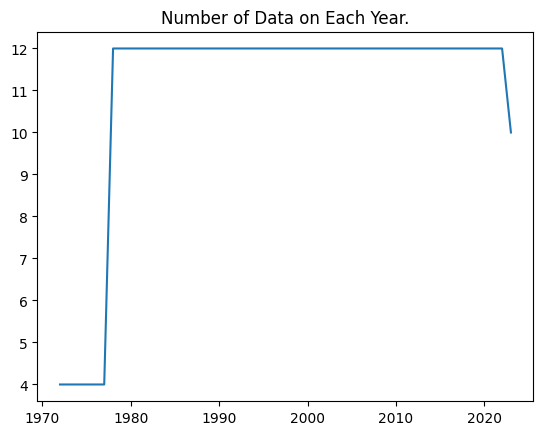

In [87]:
# groupby dataframe based on "Year" and check the count
group_year = df.groupby('Year').count()[['Date']]
plt.plot(group_year.index, group_year.values.flatten())
plt.title('Number of Data on Each Year.')

In [88]:
# Based on the observation, the data between 1973 and 1977 has missing in some months.
# Thus, removing data between 1973 and 1977.
df = df[df['Year'] >= 1978].reset_index(drop=True)
df.head()

,Date,Year,Month,MY10Y,CPI,CSENT,IPM,HOUSE,UNEMP,SP500
0,1978-01-31,1978,1,7.94,62.7,83.7,43.7471,795.0,6.4,89.250000
1,1978-02-28,1978,2,8.04,63.0,84.3,43.9139,791.0,6.3,87.040001
2,1978-03-31,1978,3,8.15,63.4,78.8,44.6899,814.0,6.3,89.209999
3,1978-04-30,1978,4,8.24,63.9,81.6,45.3905,864.0,6.1,96.830002
4,1978-05-31,1978,5,8.42,64.5,82.9,45.6235,857.0,6.0,97.239998


In [89]:
# copy the current SP500 as SP500_Price
df['SP500_Price'] = df['SP500'].loc[:]

# Create categorical data;
#  whether the S&P500 rises (1) or falls(0) from the previous year
cat_values = (df['SP500_Price'] > df['SP500_Price'].shift(12)).astype(int)
cat_values[:12] = None
df['SP500_Rise'] = cat_values

# Changes to %YoY
chg_YoY = ['CPI', 'CSENT', 'IPM', 'HOUSE', 'SP500']
df.loc[:, chg_YoY] = df[chg_YoY].pct_change(12) * 100

# drop the rows with missing values
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()

,Date,Year,Month,MY10Y,CPI,CSENT,IPM,HOUSE,UNEMP,SP500,SP500_Price,SP500_Rise
0,1979-01-31,1979,1,8.95,9.250399,-13.859020,7.862464,-5.157233,5.9,11.966387,99.930000,1.0
1,1979-02-28,1979,2,9.17,9.841270,-12.336892,7.786828,-8.596713,5.9,10.615806,96.279999,1.0
2,1979-03-31,1979,3,9.11,10.252366,-13.197970,6.418676,-2.579853,5.8,13.877365,101.589996,1.0
3,1979-04-30,1979,4,9.35,10.485133,-19.117647,2.997984,-13.425926,5.8,5.091398,101.760002,1.0
4,1979-05-31,1979,5,9.06,10.697674,-17.852835,3.917937,-15.169195,5.6,1.892230,99.080002,1.0


In [90]:
# comparisons between original and cleaned data
print('Dimensions:')
print(df_origin.shape, ' -> ', df.shape)
print('')
print('Total Missing Valies:')
print(df_origin.isna().sum().sum(), ' -> ', df.isna().sum().sum())

Dimensions:
(888, 10)  ->  (538, 12)

Total Missing Valies:
820  ->  0


In [91]:
# basic statistics (original)
features = ['MY10Y', 'CPI', 'CSENT', 'IPM', 'HOUSE', 'UNEMP', 'SP500']
df_origin[features].describe()

,MY10Y,CPI,CSENT,IPM,HOUSE,UNEMP,SP500
count,743.000000,886.000000,642.000000,622.000000,730.000000,886.000000,887.000000
mean,5.872759,122.482098,85.549688,74.287014,655.771233,5.731603,781.078714
std,2.990855,83.914413,12.899156,23.722896,208.186081,1.711548,1041.129126
min,0.550000,23.510000,50.000000,35.254500,270.000000,2.500000,17.049999
25%,3.855000,34.750000,76.025000,50.395325,515.000000,4.400000,88.895000
50%,5.620000,110.600000,89.200000,82.272800,628.500000,5.500000,249.220001
75%,7.630000,193.675000,94.975000,98.345950,765.000000,6.800000,1215.405029
max,15.840000,307.619000,112.000000,106.420200,1389.000000,14.700000,4766.180176


In [92]:
# basic statistics (current)
df[features].describe()

,MY10Y,CPI,CSENT,IPM,HOUSE,UNEMP,SP500
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,5.769591,3.521535,0.436273,1.879105,1.551672,6.110409,10.051391
std,3.386562,2.755466,13.486383,4.901427,19.954754,1.782045,15.899805
min,0.550000,-1.958761,-41.520468,-19.513084,-50.534759,3.400000,-44.756241
25%,2.942500,1.901664,-6.547973,-0.287418,-10.868578,4.800000,2.071541
50%,5.070000,2.844395,0.299743,2.346995,2.734806,5.700000,11.647982
75%,7.997500,4.129159,6.687060,4.720490,13.591408,7.200000,19.604311
max,15.840000,14.592275,47.582205,20.819818,88.200590,14.700000,53.714506


# Data Observation

### Correlation Matrix

In [93]:
# correlation Matrix
df[features].corr()

,MY10Y,CPI,CSENT,IPM,HOUSE,UNEMP,SP500
MY10Y,1.000000,0.592226,0.131251,0.159912,-0.106573,0.281409,0.040220
CPI,0.592226,1.000000,-0.229705,0.023940,-0.362021,0.008407,-0.019945
CSENT,0.131251,-0.229705,1.000000,0.297866,0.404014,0.173442,0.419360
IPM,0.159912,0.023940,0.297866,1.000000,0.133360,-0.235078,0.397629
HOUSE,-0.106573,-0.362021,0.404014,0.133360,1.000000,0.137665,0.378720
UNEMP,0.281409,0.008407,0.173442,-0.235078,0.137665,1.000000,0.025050
SP500,0.040220,-0.019945,0.419360,0.397629,0.378720,0.025050,1.000000


### Feature Reduction

In [94]:
# create a new feature and insert it 
df.insert(loc=9, column='LRIR', value=df['MY10Y'] - df['CPI'])

# drop MY10Y and CPI
df.drop(['MY10Y', 'CPI'], axis=1, inplace=True)

# show new dimension
print("New Dimension: ", df.shape)

# show new correlation matrix
features = ['CSENT', 'IPM', 'HOUSE', 'UNEMP', 'LRIR', 'SP500']
df[features].corr()

New Dimension:  (538, 11)


,CSENT,IPM,HOUSE,UNEMP,LRIR,SP500
CSENT,1.000000,0.297866,0.404014,0.173442,0.380726,0.419360
IPM,0.297866,1.000000,0.133360,-0.235078,0.168055,0.397629
HOUSE,0.404014,0.133360,1.000000,0.137665,0.224958,0.378720
UNEMP,0.173442,-0.235078,0.137665,1.000000,0.328573,0.025050
LRIR,0.380726,0.168055,0.224958,0.328573,1.000000,0.067550
SP500,0.419360,0.397629,0.378720,0.025050,0.067550,1.000000


### Skewness

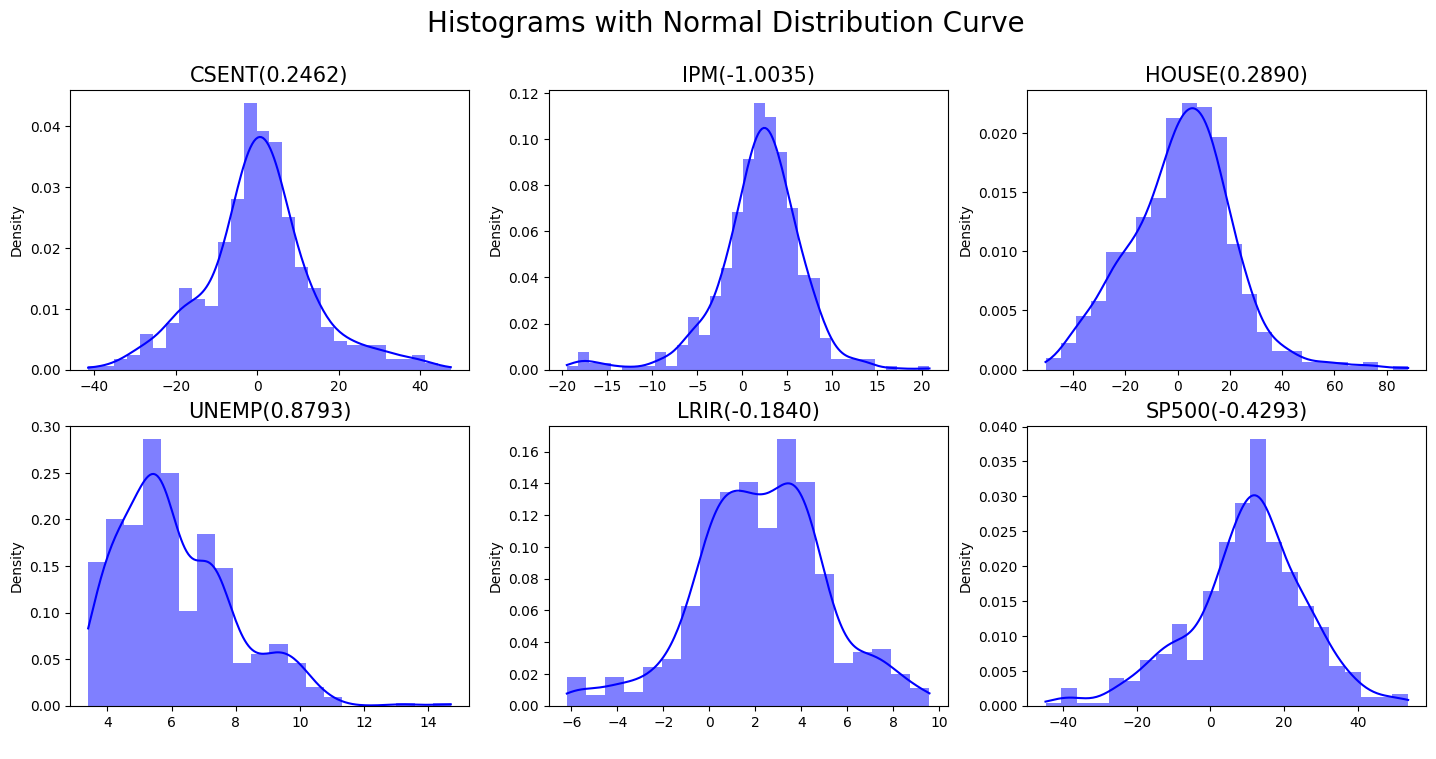

In [13]:
# plotting histograms
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(17.5, 8))
fig.suptitle('Histograms with Normal Distribution Curve', size=20)

for i, f in enumerate(features):
    r, c = divmod(i, 3)
    sns.histplot((df[f]), kde=True, color="blue", stat="density", linewidth=0, ax=ax[r][c])
    ax[r][c].set_title(f"{f}({skew(df[f]):.4f})", size=15)
    ax[r][c].set_xlabel(' ')

Text(0.5, 0, ' ')

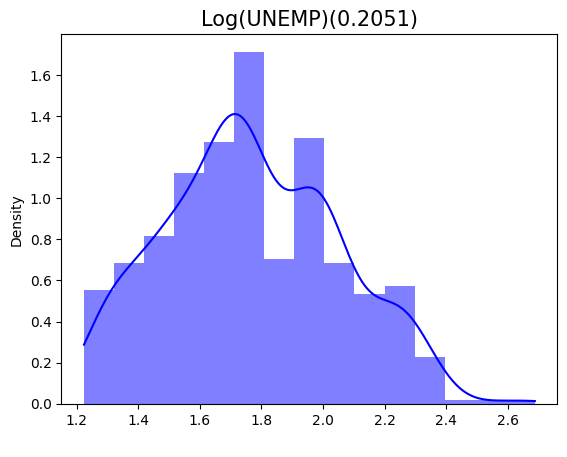

In [95]:
# change the "UNEMP" to log scale
df['UNEMP'] = np.log(df['UNEMP'])

# plotting the histogram again
sns.histplot(df['UNEMP'], kde=True, color="blue", stat="density", linewidth=0)
plt.title(f"Log(UNEMP)({skew(df['UNEMP']):.4f})", size=15)
plt.xlabel(' ')

### Correlation Plots

C:\Users\runru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


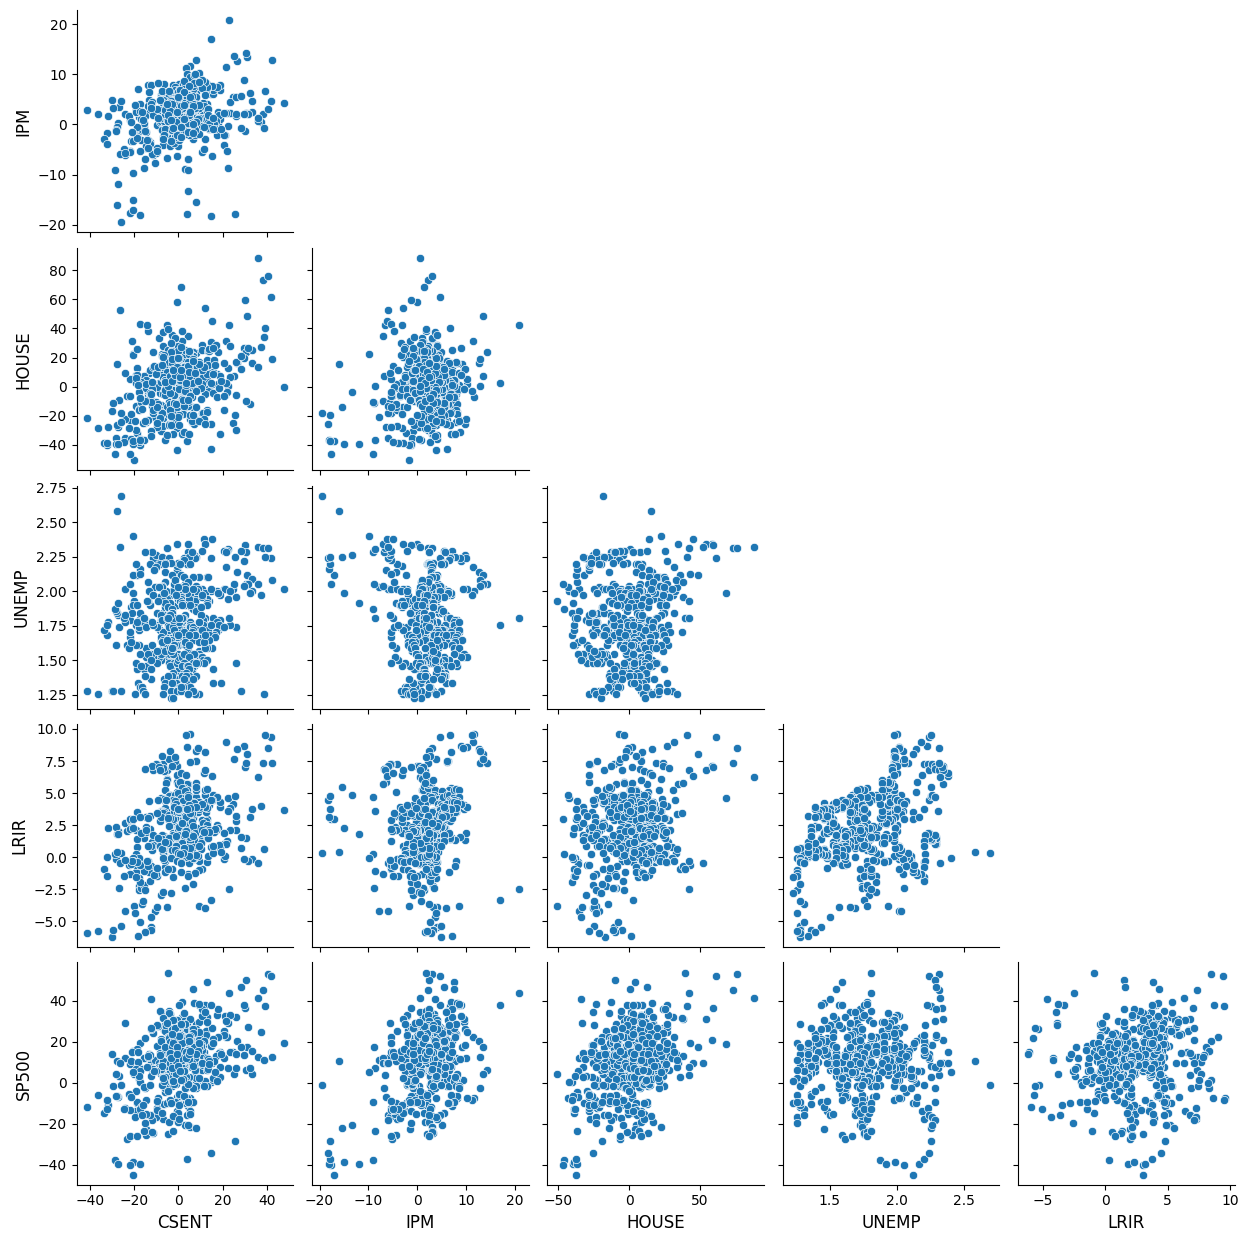

In [16]:
corr_plot = sns.pairplot(df[features], diag_kind=None)

for i in range(len(features)):
    for j in range(len(features)):
        if i <= j:  # This condition identifies upper triangle and diagonal plots
            corr_plot.axes[i, j].set_visible(False)

# Iterate again to set axis label font sizes (only for visible plots)
for ax in corr_plot.axes.flatten():
    if ax.get_visible():
        # Set x-axis label
        ax.set_xlabel(ax.get_xlabel(), fontsize='large')
        # Set y-axis label
        ax.set_ylabel(ax.get_ylabel(), fontsize='large')

plt.show()

### Trends of Economic Data

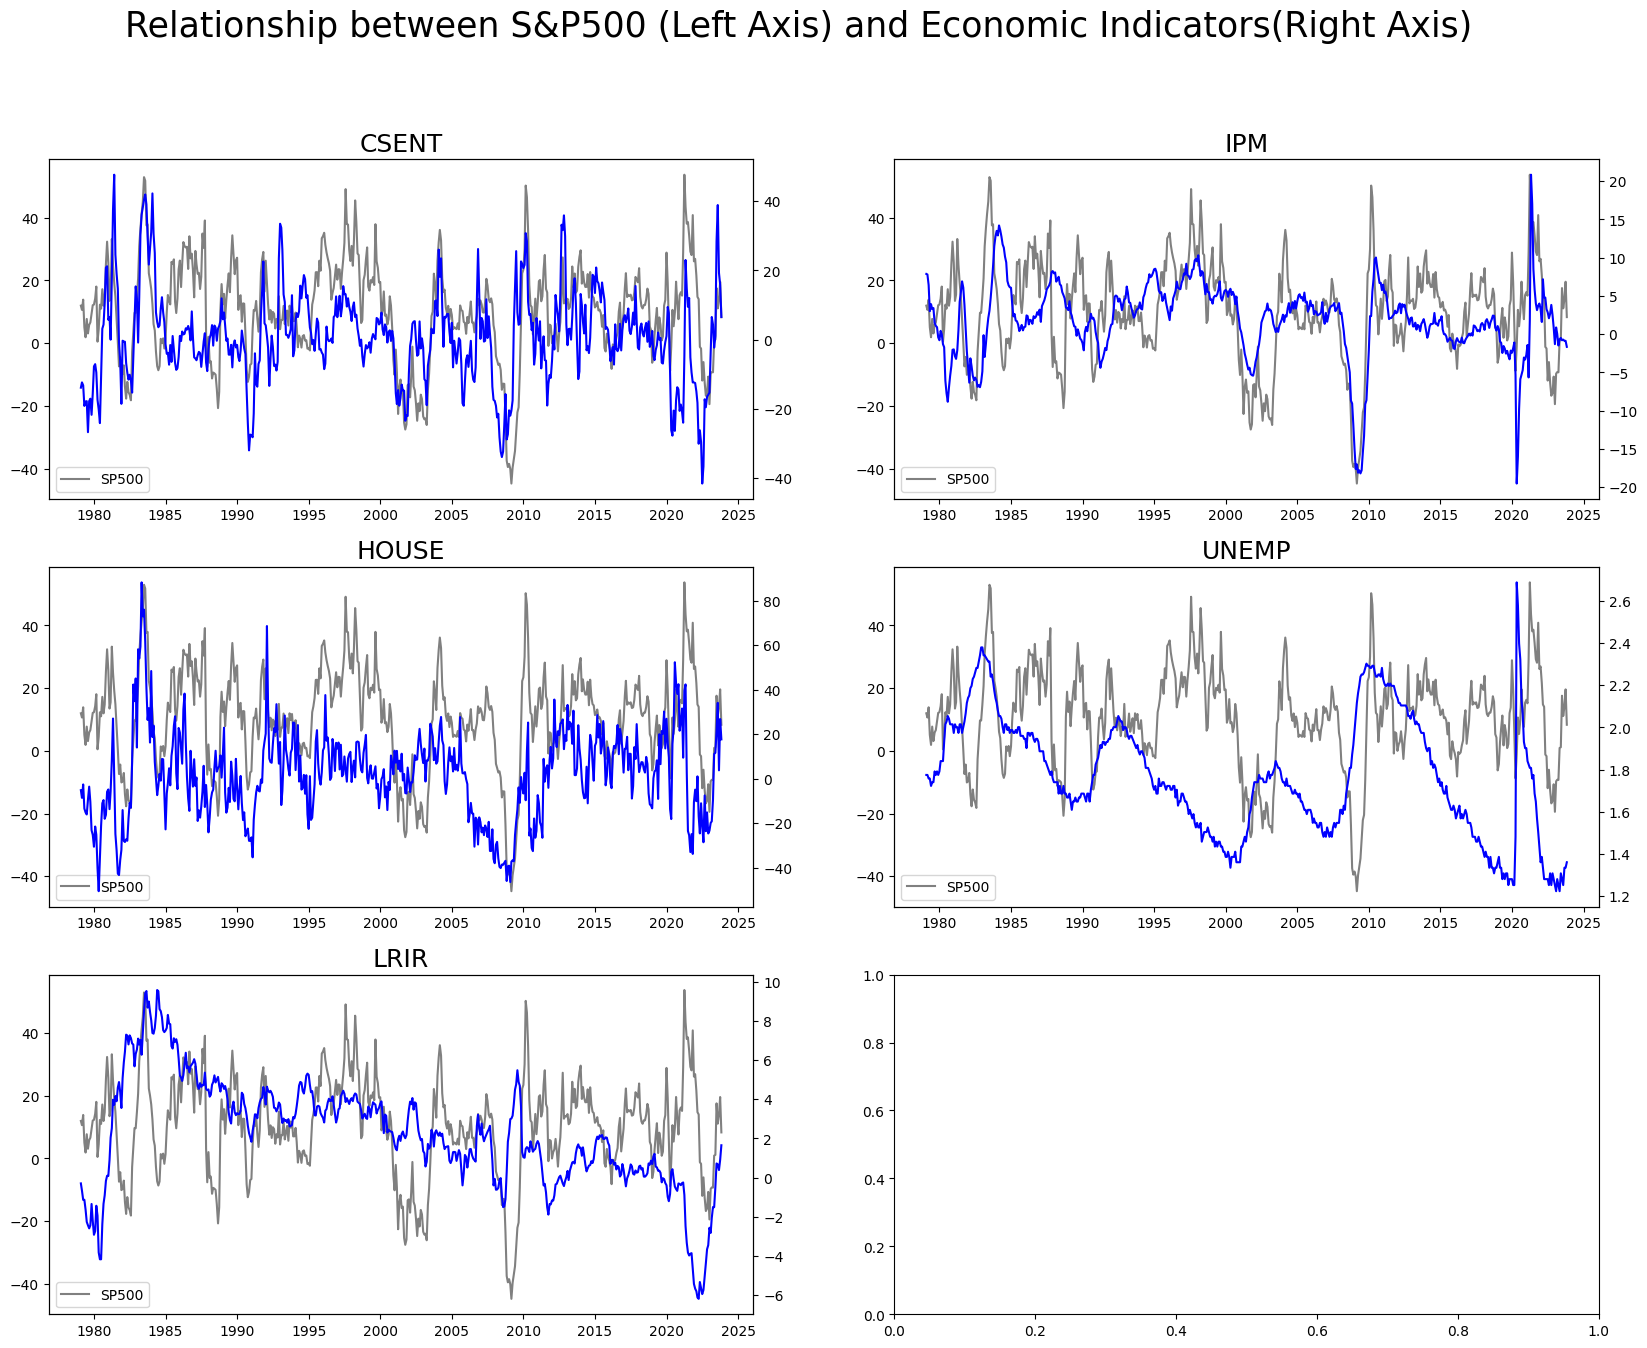

In [17]:
# Observing the relationships between S&P500 idex and economic indicators
rows, cols = 3, 2

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 15))
fig.suptitle('Relationship between S&P500 (Left Axis) and Economic Indicators(Right Axis)', fontsize=25)

for idx, d in enumerate(features[:-1]):
    i, j = idx // cols, idx % cols
    # plot two line charts
    ax[i][j].plot(pd.to_datetime(df['Date']), df['SP500'], color='grey', label='SP500')
    ax[i][j].twinx().plot(pd.to_datetime(df['Date']), df[d], color='blue', label=d)
    ax[i][j].set_title(f"{d}", fontsize=18)
    ax[i][j].legend()


### Stratified Histogram

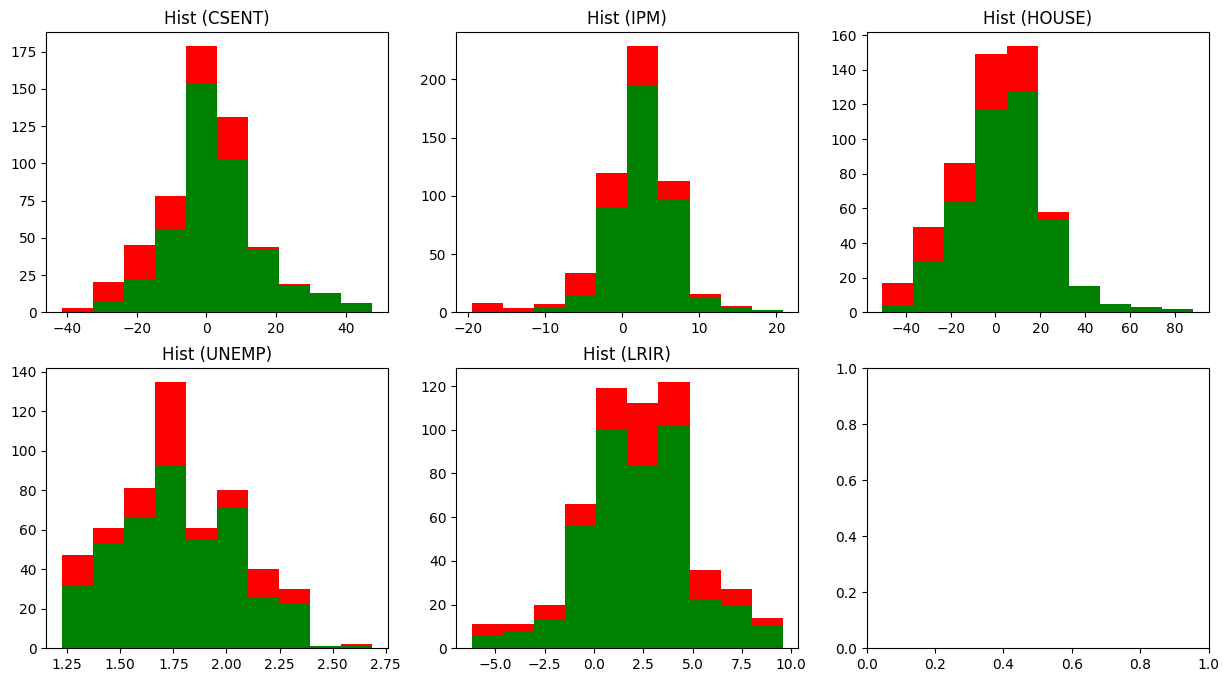

In [18]:
# Check histogram of each independent variable based on the ratio of categorical data.
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
for i, data in enumerate(['CSENT', 'IPM', 'HOUSE', 'UNEMP', 'LRIR']):
    i1, i2 = i // 3, i % 3
    rise = df[df['SP500_Rise'] == 1.0][data]
    fall = df[df['SP500_Rise'] == 0.0][data]
    ax[i1][i2].hist([rise, fall], color=['green', 'red'], stacked=True)
    ax[i1][i2].set_title(f'Hist ({data})')


### Stratified Scatter Plot

C:\Users\runru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


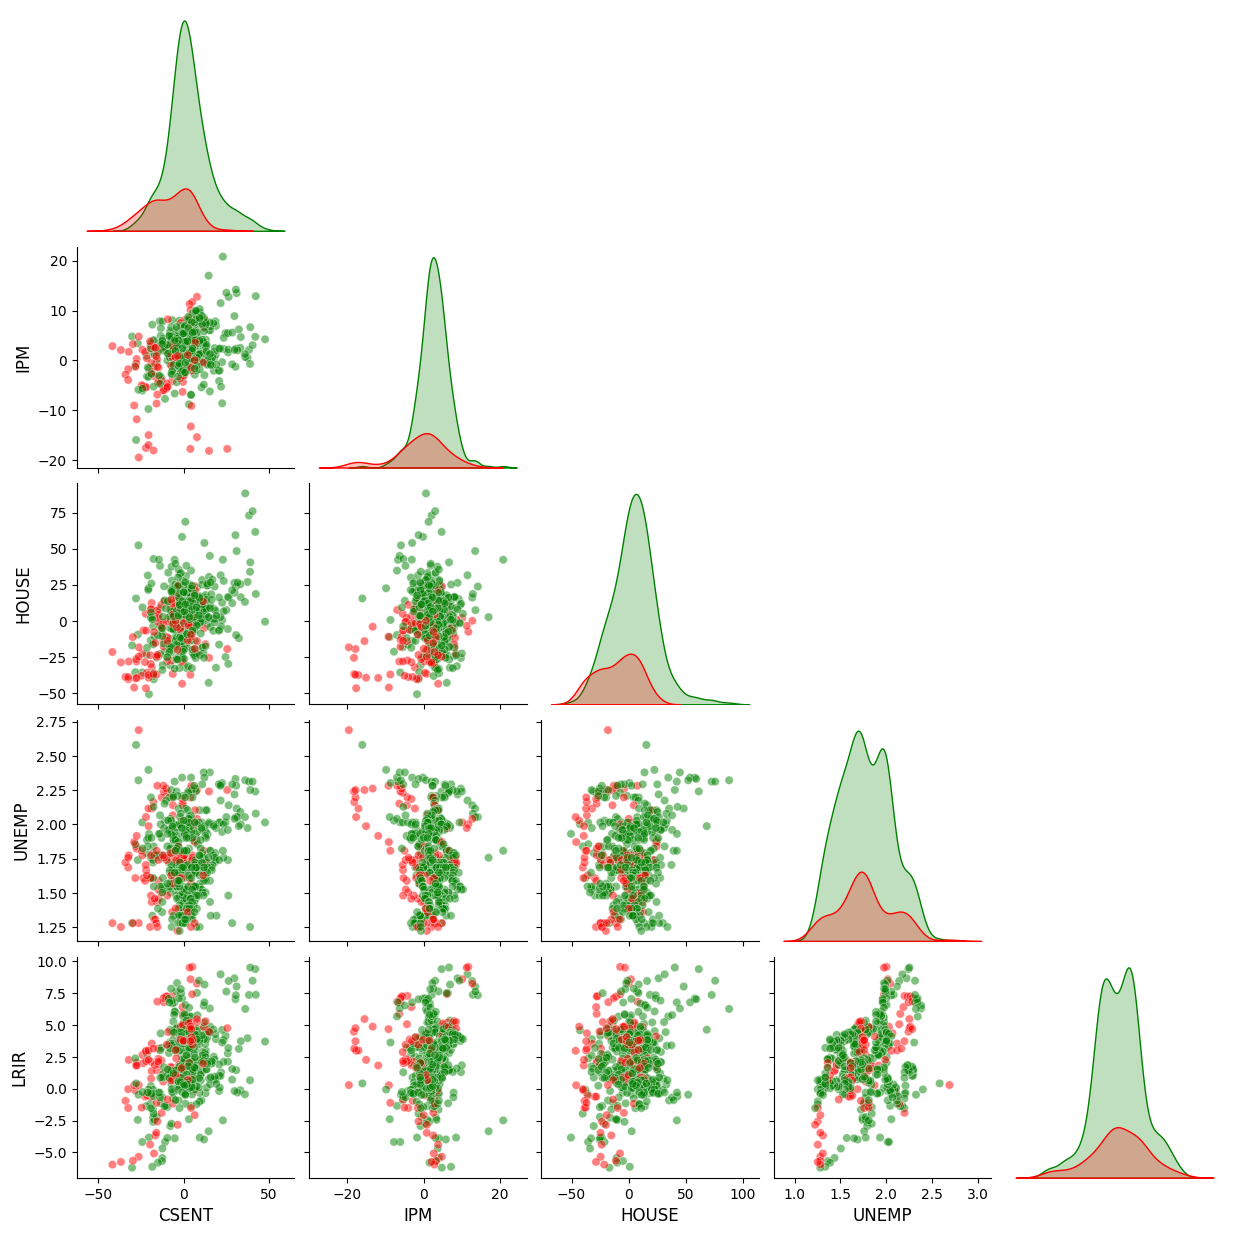

In [19]:
# Check the pairs (two independent variables) of the scatter plots based on the categorical data.

indicators = ['CSENT', 'IPM', 'HOUSE', 'UNEMP', 'LRIR']

corr_plot2 = sns.pairplot(df[indicators + ['SP500_Rise']], hue='SP500_Rise', 
                          plot_kws={'alpha': 0.5}, palette={1: "green", 0: "red"})

# Remove the existing legend
corr_plot2._legend.remove()

for i in range(len(indicators)):
    for j in range(len(indicators)):
        if i <= j:  # This condition identifies upper triangle and diagonal plots
            corr_plot2.axes[i, j].set_visible(False)

# Iterate again to set axis label font sizes (only for visible plots)
for ax in corr_plot2.axes.flatten():
    if ax.get_visible():
        # Set x-axis label
        ax.set_xlabel(ax.get_xlabel(), fontsize='large')
        # Set y-axis label
        ax.set_ylabel(ax.get_ylabel(), fontsize='large')

plt.show()

# Modeling

In [83]:
%load_ext autoreload
%autoreload 2
from Functions import PredictiveAnalysis

# reload
#%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data Set Creation

- Three types of moving averages
- Rolling Standardization

In [103]:
# load clean df
#df = pd.read_csv('final.csv')

# create dataset for model learning
PA = PredictiveAnalysis(df)
new_df = PA.create_data(['CSENT', 'IPM', 'HOUSE', 'UNEMP', 'LRIR'], 'SP500', ma=[1,2,3], fp=[1,2,3,4,5,6], init_train=120, poly_d=1)
new_df.head()

,Date,CSENT,IPM,HOUSE,UNEMP,LRIR,SP500_1MA_num,SP500_2MA_num,SP500_3MA_num,SP500_1MA_cat,SP500_2MA_cat,SP500_3MA_cat
0,1980-01-31,-0.810079,-0.352724,-0.941321,-0.621435,-2.673501,14.239971,13.274393,12.883389,1.0,1.0,1.0
1,1980-02-29,-0.980120,-0.439709,-1.087918,-0.621435,-2.227750,18.051522,16.145747,14.866769,1.0,1.0,1.0
2,1980-03-31,-1.541930,-0.689813,-1.686400,-0.621435,-2.403204,0.492174,9.271848,10.927889,1.0,1.0,1.0
3,1980-04-30,-1.737144,-0.763514,-2.096190,-0.164005,-3.048393,4.451650,2.471912,7.665115,1.0,1.0,1.0
4,1980-05-31,-2.015782,-1.608279,-1.498012,0.255260,-3.167512,12.272907,8.362278,5.738910,1.0,1.0,1.0


In [104]:
new_df.info()
new_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           526 non-null    object 
 1   CSENT          526 non-null    float64
 2   IPM            526 non-null    float64
 3   HOUSE          526 non-null    float64
 4   UNEMP          526 non-null    float64
 5   LRIR           526 non-null    float64
 6   SP500_1MA_num  526 non-null    float64
 7   SP500_2MA_num  526 non-null    float64
 8   SP500_3MA_num  526 non-null    float64
 9   SP500_1MA_cat  526 non-null    float64
 10  SP500_2MA_cat  526 non-null    float64
 11  SP500_3MA_cat  526 non-null    float64
dtypes: float64(11), object(1)
memory usage: 49.4+ KB


,CSENT,IPM,HOUSE,UNEMP,LRIR,SP500_1MA_num,SP500_2MA_num,SP500_3MA_num,SP500_1MA_cat,SP500_2MA_cat,SP500_3MA_cat
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,-0.098352,-0.109714,-0.045714,-0.193634,-0.609034,10.089740,10.093540,10.090060,0.777567,0.775665,0.790875
std,1.106031,1.182749,1.141277,1.186697,1.105977,16.068426,15.698963,15.402196,0.416277,0.417540,0.407071
min,-3.152664,-6.508897,-3.652885,-2.176269,-4.124278,-44.756241,-42.423459,-41.508535,0.000000,0.000000,0.000000
25%,-0.665009,-0.420523,-0.686559,-1.198617,-1.223023,1.806491,1.150158,1.936186,1.000000,1.000000,1.000000
50%,-0.090188,0.029952,0.025237,-0.239510,-0.476399,11.828908,11.427840,11.557000,1.000000,1.000000,1.000000
75%,0.556346,0.440117,0.739032,0.517975,0.089167,20.113074,19.974670,20.162192,1.000000,1.000000,1.000000
max,3.064317,5.562170,3.419290,3.362858,2.770272,53.714506,52.369902,49.962131,1.000000,1.000000,1.000000


# Model Creation & Evaluation

- Four machine learning models
    1. Multiple Linear Regression
    3. Logistic Regression
    4. Classification and Regression Tree

<br>

- Evaluations
    - Regressions:
        - <b>Root Mean Square Error (RMSE)</b>: How much errors could occur between the predicted prices and the actual ones.
        - <b>Standard Error of Estimate (SE)</b>: How much variation could occur in the actual target based on the same condition of independent variables. 
        - <b>Coffeficient of Determination (R2)</b>: How well the regression model explains the variation of a target value.
        - <b>Adjusted R2</b>: R2 with the penalty for the number of independent variables.
        <br><br>
        
    - Classification
        - <b>Accuracy</b>: How the model can correctly predict the target values.
        - <b>Precision</b>: How the model can avoid false positives.
        - <b>Recall</b>: How the model can avoid false negatives.
        - <b>F1 Score</b>: How the model can balance precision and recall.
        - <b>AUC (Area Under the ROC Curve)</b>: How the model can summarize the ROC curve.

In [105]:
# define function to plot visualization horizontally
from plotly.subplots import make_subplots
def horizon_plots(figs, model,**subplots_arg):
    perf_figs = make_subplots(rows=1, cols=len(figs), horizontal_spacing=0.05, **subplots_arg)
    perf_figs.update_layout(
        height=400, 
        width=300*len(figs) + 50
    )

    annotations = []

    for i, f in enumerate(figs):
        for j, f_d in enumerate(f.data):
            f_d.showlegend = True if i == 0 else False
            perf_figs.add_trace(f_d, row=1, col=i+1)

            if j == 0:
                annotations.append(dict(
                    xref=f'x{i+1}', yref='paper', x=0.5, y=1.05,
                    xanchor='center', yanchor='bottom', text=f.layout.title.text, 
                    font=dict(size=15), showarrow=False
                ))

    perf_figs.update_layout(
        title=f"Comparing the {model} Results on Different Conditions", 
        annotations=annotations, template='plotly_dark',
        legend_title_text='Moving Averages', 
        legend=dict(orientation='h', yanchor='bottom', y=-0.25, xanchor='center', x=0.5)
        )
    
    return perf_figs

#### Multiple linear Regression

In [108]:
# comparing model performance & backward elimination test
fig1_1, fig1_2, fig1_3 = PA.model_learning(model='LinR', scopes=[1, 3, 6, 9, 12])

horizon_plots(fig1_1, 'Linear Model').show()
fig1_2.show()
fig1_3.show()

In [109]:
# detailed performance
# Feel free to change the variables; ma(moving averages), fp(how many months ahead), and sc(scopes)
fig2_1, fig2_2 = PA.detail_perf(model='LinR', ma=1, fp=2, sc=1)
fig2_1.show()
fig2_2.show()

In [119]:
"""
# store necessary info on json file
default_linear = {
    'RMSE': fig1_1[0],
    'SE': fig1_1[1],
    'R2': fig1_1[2],
    'adj_R2': fig1_1[3],
    'BE': fig1_2,
    'Coef': fig1_3,
    'pred_df': PA.pred_df['LinR'].to_dict('records')
}

# Convert figures to JSON
serialized_figures = {key: json.dumps(fig, cls=PlotlyJSONEncoder) for key, fig in default_linear.items()}
# Save to a JSON file
with open('json_files/default_linear.json', 'w') as file:
    json.dump(serialized_figures, file)
"""

#### Logistic Regression

In [111]:
# comparing model performance & backward elimination test
fig2_1, fig2_2, fig2_3 = PA.model_learning(model='LogR', scopes=[1,3,6,9,12])

horizon_plots(fig2_1, 'Logistic Model', shared_yaxes=True).show()
fig2_2.show()
fig2_3.show()

In [112]:
"""
# store necessary info on json file
default_logit = {
    'Accuracy': fig2_1[0],
    'Precision': fig2_1[1],
    'Recall': fig2_1[2],
    'F1_Score': fig2_1[3],
    'AUC': fig2_1[4],
    'BE': fig2_2,
    'Coef': fig2_3,
    'pred_df': PA.pred_df['LogR'].to_dict('records')
}

# Convert figures to JSON
serialized_figures = {key: json.dumps(fig, cls=PlotlyJSONEncoder) for key, fig in default_logit.items()}
# Save to a JSON file
with open('json_files/default_logit.json', 'w') as file:
    json.dump(serialized_figures, file)
"""

#### Classification and Regression Tree (CART)

In [113]:
fig3_1, _, fig3_3 = PA.model_learning(model='CART', max_death_=5)

horizon_plots(fig3_1, 'CART Model').show()
fig3_3.show()

In [114]:
# detailed performance
f3_1, f3_2 = PA.detail_perf(model='CART', ma=1, fp=2)
f3_1.show()
f3_2.show()

In [115]:
"""
# store necessary info on json file
default_cart = {
    'RMSE': fig3_1[0],
    'SE': fig3_1[1],
    'R2': fig3_1[2],
    'adj_R2': fig3_1[3],
    'Coef': fig3_3,
    'pred_df': PA.pred_df['CART'].to_dict('records')
}

# Convert figures to JSON
serialized_figures = {key: json.dumps(fig, cls=PlotlyJSONEncoder) for key, fig in default_cart.items()}
# Save to a JSON file
with open('json_files/default_cart.json', 'w') as file:
    json.dump(serialized_figures, file)

"""

#### Final Model Creation

In [116]:
final_PA = PredictiveAnalysis(df)
new_df = final_PA.create_data(['CSENT', 'IPM', 'HOUSE', 'UNEMP', 'LRIR'], 'SP500', ma=[1,2,3], fp=[1,2], init_train=120, poly_d=1)

f_fig1_1, f_fig1_2, f_fig1_3 = final_PA.model_learning(model='LinR', scopes=[1, 3])

horizon_plots(f_fig1_1, 'Linear Model').show()
f_fig1_2.show()
f_fig1_3.show()

In [117]:
# detailed performance
f_fig2_1, f_fig2_2 = final_PA.detail_perf(model='LinR', ma=1)
f_fig2_1.show()
f_fig2_2.show()

In [118]:
"""
# store necessary info on json file
final_linear = {
    'RMSE': f_fig1_1[0],
    'SE': f_fig1_1[1],
    'R2': f_fig1_1[2],
    'adj_R2': f_fig1_1[3],
    'BE': f_fig1_2,
    'Coef': f_fig1_3,
    'pred_df': final_PA.pred_df['LinR'].to_dict('records')
}

# Convert figures to JSON
serialized_figures = {key: json.dumps(fig, cls=PlotlyJSONEncoder) for key, fig in final_linear.items()}
# Save to a JSON file
with open('json_files/final_linear.json', 'w') as file:
    json.dump(serialized_figures, file)
"""